In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text 

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 80)

In [4]:
df = pd.read_csv('2019 Member Survey - Raw Data.csv', header=[0,1], low_memory=False)

In [5]:
df.shape

(6172, 454)

In [6]:
print(df.info(verbose=True, null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 454 columns):
(Respondent ID, Unnamed: 0_level_1)                                                                                              6172 non-null int64
(Collector ID, Unnamed: 1_level_1)                                                                                               6172 non-null int64
(Start Date, Unnamed: 2_level_1)                                                                                                 6172 non-null object
(End Date, Unnamed: 3_level_1)                                                                                                   6172 non-null object
(IP Address, Unnamed: 4_level_1)                                                                                                 6172 non-null object
(Email Address, Unnamed: 5_level_1)                                                                                              6172 non-null o

In [7]:
col_df = pd.DataFrame(df.columns.to_numpy().reshape([-1, 1]))

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 80):
    print(col_df)

                                                                                   0
0                                                (Respondent ID, Unnamed: 0_level_1)
1                                                 (Collector ID, Unnamed: 1_level_1)
2                                                   (Start Date, Unnamed: 2_level_1)
3                                                     (End Date, Unnamed: 3_level_1)
4                                                   (IP Address, Unnamed: 4_level_1)
5                                                (Email Address, Unnamed: 5_level_1)
6                                                   (First Name, Unnamed: 6_level_1)
7                                                    (Last Name, Unnamed: 7_level_1)
8                                                (Custom Data 1, Unnamed: 8_level_1)
9                                                       (How old are you?, Response)
10                                       (To what gender do you i

In [9]:
df_noobs = df[(df.iloc[:,33] == 'I just started') | (df.iloc[:,33] == '6 - 12 months') | (df.iloc[:,33] == '1-3 years')]

In [10]:
print(f"length total: {len(df)}")
print(f"length noobs: {len(df_noobs)}")

length total: 6172
length noobs: 1734


In [11]:
df.iloc[:,104].value_counts(normalize=True)

Strongly Disagree    0.419605
Disagree             0.398929
Neutral              0.133653
Agree                0.036182
Strongly Agree       0.011630
Name: (Unnamed: 104_level_0, If I could pay $10 extra to receive my VMP shipments FASTER, then I would), dtype: float64

In [12]:
def col_binary_encode(col_idx_list, data_frame):
    """ 
    Function to binary encode the values in a pandas DataFrame column.

    Parameters: 
        col_idx_list (int): The index of the column to be encoded.
        data_frame: Name of the DataFrame containing the column in question.

    Returns: 
        DataFrame column with values encoded as follows:
            'str(column title)' --> 1
            anything else       --> 0
    """
    for col_idx in col_idx_list:
        label = data_frame.columns.get_level_values(1)[col_idx]
        data_frame.iloc[:,col_idx] = data_frame.iloc[:,col_idx].apply(lambda x:
                                    1 if (str(x) == str(label)) | (x == 1) else 0)

In [13]:
encode_col_list = list(range(17, 33))
col_binary_encode(encode_col_list, df)
col_binary_encode(encode_col_list, df_noobs)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
encode_col_list = list(range(108, 120))
col_binary_encode(encode_col_list, df)
col_binary_encode(encode_col_list, df_noobs)

In [15]:
# df.head(5)

In [16]:
# Col 36 - About how many records do you buy per month?
# 3-Feb         --> 2-3
# 5-Apr         --> 4-5
# 0 - 1         --> 0-1
# 10-Jun        --> 6-10
# More than 10  --> More than 10

In [17]:
df.iloc[:,34].fillna(0, inplace=True)

In [18]:
df.iloc[:,34].median()

215.0

In [19]:
df_noobs.iloc[:,34].median()

80.0

In [20]:
df.iloc[:,34].max()

101099.0

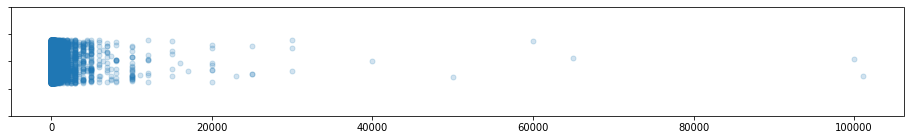

In [21]:
def one_dim_scatterplot(data, ax, jitter=0.4, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(df.iloc[:,34], ax, s=25, alpha=0.2)

In [24]:
np.percentile(df.iloc[:,34].to_numpy(), 90)

1500.0

In [22]:
df.iloc[:,34].mean()

754.8421905379132

In [23]:
df_noobs.iloc[:,34].mean()

141.6159169550173

In [24]:
df.iloc[:,125].value_counts(normalize=True)

Satisfied            0.484266
Very Satisfied       0.336160
Neutral              0.124929
Dissatisfied         0.046919
Very Dissatsified    0.007726
Name: (How satisfied are you with the following?, Record of the Month (selection, package quality)), dtype: float64

In [25]:
df_noobs.iloc[:,125].value_counts(normalize=True)

Satisfied            0.461039
Very Satisfied       0.359740
Neutral              0.127273
Dissatisfied         0.046104
Very Dissatsified    0.005844
Name: (How satisfied are you with the following?, Record of the Month (selection, package quality)), dtype: float64

In [26]:
df.iloc[:,36].value_counts(normalize=True)

3-Feb           0.452463
5-Apr           0.204616
0 - 1           0.186531
10-Jun          0.099380
More than 10    0.057010
Name: (About how many records do you buy per month?, Response), dtype: float64

In [27]:
df_noobs.iloc[:,36].value_counts(normalize=True)

3-Feb           0.489043
0 - 1           0.265859
5-Apr           0.158016
10-Jun          0.064591
More than 10    0.022491
Name: (About how many records do you buy per month?, Response), dtype: float64

In [28]:
df.iloc[:,68].value_counts(normalize=True)

Disagree             0.462244
Strongly Disagree    0.247883
Neutral              0.215596
Agree                0.055222
Strongly Agree       0.019054
Name: (Unnamed: 68_level_0, The quality of the vinyl package is more important than the music.), dtype: float64

In [29]:
df_noobs.iloc[:,68].value_counts(normalize=True)

Disagree             0.466627
Neutral              0.245530
Strongly Disagree    0.202622
Agree                0.063170
Strongly Agree       0.022050
Name: (Unnamed: 68_level_0, The quality of the vinyl package is more important than the music.), dtype: float64

In [30]:
df.iloc[:,79].value_counts(normalize=True)

Agree                0.326394
Neutral              0.292696
Disagree             0.195836
Strongly Agree       0.112562
Strongly Disagree    0.072512
Name: (Unnamed: 79_level_0, I prefer to stream an album before I choose to buy it on vinyl.), dtype: float64

In [31]:
df_noobs.iloc[:,79].value_counts(normalize=True)

Agree                0.365316
Neutral              0.252682
Strongly Agree       0.181764
Disagree             0.151967
Strongly Disagree    0.048272
Name: (Unnamed: 79_level_0, I prefer to stream an album before I choose to buy it on vinyl.), dtype: float64

In [32]:
df.iloc[:,81].value_counts(normalize=True)

Neutral              0.357092
Disagree             0.258116
Agree                0.228652
Strongly Disagree    0.103564
Strongly Agree       0.052576
Name: (Unnamed: 81_level_0, It’s important to me that the records I buy are limited/exclusive.), dtype: float64

In [33]:
df_noobs.iloc[:,81].value_counts(normalize=True)

Neutral              0.328963
Disagree             0.263409
Agree                0.241955
Strongly Disagree    0.100119
Strongly Agree       0.065554
Name: (Unnamed: 81_level_0, It’s important to me that the records I buy are limited/exclusive.), dtype: float64

In [34]:
df.iloc[:,107].value_counts(normalize=True)

I’m cool with it as long as I vibe with the music                                    0.422374
I’d be excited to get anything free!                                                 0.398006
It has to be worthy of my collection / on my shelves                                 0.149714
I don’t want anything that I didn’t choose to receive, even if I’d like the music    0.029906
Name: (How would you feel if we sent you a free vinyl record sponsored by a brand?, Response), dtype: float64

In [35]:
df_noobs.iloc[:,107].value_counts(normalize=True)

I’d be excited to get anything free!                                                 0.438053
I’m cool with it as long as I vibe with the music                                    0.414665
It has to be worthy of my collection / on my shelves                                 0.117573
I don’t want anything that I didn’t choose to receive, even if I’d like the music    0.029709
Name: (How would you feel if we sent you a free vinyl record sponsored by a brand?, Response), dtype: float64

In [36]:
df.iloc[:,123].fillna(value='', inplace=True)

In [37]:
fav_123_text = list(df.iloc[:,123].to_numpy())

In [38]:
my_stop_words = text.ENGLISH_STOP_WORDS.union('vmp',
                                              'really',
                                              'like')

In [39]:
fav_123_vect = CountVectorizer(lowercase=True,
                               tokenizer=None,
                               stop_words='english',
                               ngram_range=(0,5),
                               max_features=50)
fav_123_vect.fit(fav_123_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=50, min_df=1,
                ngram_range=(0, 5), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [40]:
# fav_123_vect.get_feature_names()

## sklearn LDA

In [41]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

def sklearn_lda(col_num, data_frame, num_topics=5):
    data_frame.iloc[:,col_num].fillna(value='noresponsegiven', inplace=True)
    col_text = list(data_frame.iloc[:,col_num].to_numpy())
    
    my_stop_words = text.ENGLISH_STOP_WORDS.union('vmp',
                                              'really',
                                              'like',
                                              'noresponsegiven')

    vect = CountVectorizer(lowercase=True,
                           tokenizer=None,
                           stop_words=my_stop_words,
                           ngram_range=(0,5),
                           max_features=1000)
    vect.fit(col_text)
    trans_text = vect.fit_transform(col_text)
    feature_names = vect.get_feature_names()
    lda = LatentDirichletAllocation(n_components=num_topics,
                                    max_iter=10,
                                    learning_method='online',
                                    random_state=42,
                                    n_jobs=-1)
    lda.fit(trans_text)
    num_top_words = 10
    print(f"Column {col_num} - Label: {data_frame.columns.to_numpy()[col_num]}\n")
    print(f"LDA Topic Analysis with {num_topics} topics:\n")
    display_topics(lda, feature_names, num_top_words)

In [42]:
# column_lda(123, df)

In [43]:
# column_lda(123, df_noobs)

In [44]:
# sklearn_lda(124, df)

In [45]:
# sklearn_lda(124, df_noobs)

In [46]:
# column_lda(94, df)

In [47]:
# column_lda(94, df_noobs)

In [48]:
# column_lda(95, df)

In [49]:
# column_lda(95, df_noobs)

In [50]:
# Most played
# df.iloc[:,97].value_counts()

In [51]:
# Least played
# df.iloc[:,98].value_counts()

In [52]:
# column_lda(35, df, num_topics=5)

In [53]:
# column_lda(35, df_noobs, num_topics=5)

In [54]:
# column_lda(83, df, num_topics=5)

In [55]:
# column_lda(83, df_noobs, num_topics=5)

In [56]:
# column_lda(436, df, num_topics=5)

In [57]:
# column_lda(436, df_noobs, num_topics=5)

In [58]:
# column_lda(452, df, num_topics=5)

In [59]:
# column_lda(452, df_noobs, num_topics=5)

In [60]:
# column_lda(453, df, num_topics=5)

In [61]:
# column_lda(453, df_noobs, num_topics=5)

## Standard gensim LDA
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [62]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

# import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [63]:
# gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
# Convert a document into a list of tokens.
# This lowercases, tokenizes, de-accents (optional).
# – the output are final tokens = unicode strings, that won’t be processed any further.

def sentences_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))


def make_bigrams(texts):
    
    # Build bigram model - higher threshold = fewer phrases
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=25)
    
    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_model = gensim.models.phrases.Phraser(bigram)
    
    return [bigram_model[doc] for doc in texts]


def make_trigrams(texts):

    # Build trigram model - higher threshold = fewer phrases
    trigram = gensim.models.Phrases(bigram[texts], threshold=20)  
        
    # Faster way to get a sentence clubbed as a trigram/bigram
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    return [trigram_mod[bigram_mod[doc]] for doc in texts]


# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    nlp = spacy.load('en', disable=['parser', 'ner'])
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc
                          if token.pos_ in allowed_postags])
    return texts_out

# Compute Perplexity
def perplexity(model, corpus):
    # a measure of how good the model is. lower the better.
    perplexity = model.log_perplexity(corpus)
    return perplexity
  
# Compute Coherence Score
def coherence_score(model, lemmatized_text, dictionary):
    coherence_model = CoherenceModel(model=model,
                                     texts=lemmatized_text,
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

# NLTK Stop words
stop_words = stopwords.words('english')
stop_words.extend(['noresponsegiven', 'vmp'])

In [64]:
def gensim_standard_LDA(col_num, data_frame, num_topics=5, num_words=20):
    data_frame.iloc[:,col_num].fillna(value='noresponsegiven', inplace=True)
    
    corpus_raw = list(data_frame.iloc[:,col_num].to_numpy())
    
    gensim_words = list(sentences_to_words(corpus_raw))
    
    # Form Bigrams & Trigrams
    gensim_words_bigrams = make_bigrams(gensim_words)
    gensim_words_trigrams = make_trigrams(gensim_words_bigrams)

    # Remove Stop Words
    gensim_words_nostops = remove_stopwords(gensim_words_trigrams)

    # Do lemmatization keeping only noun, adj, vb, adv
    gensim_words_lemmatized = lemmatization(gensim_words_trigrams,
                                    allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    # Create Dictionary
    id2word = corpora.Dictionary(gensim_words_lemmatized)

    # Create Corpus
    texts = gensim_words_lemmatized

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    
    # Build LDA model
    gensim_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                       id2word=id2word,
                                                       num_topics=num_topics, 
                                                       random_state=42,
                                                       passes=10,
                                                       alpha='auto',
                                                       per_word_topics=True)

    print(f"Column {col_num} - Label: {data_frame.columns.to_numpy()[col_num]}\n")
    print(f"Gensim standard LDA Topic Analysis with {num_topics} topics:\n")
    
    # Print topics and words
    x = gensim_lda_model.show_topics(num_topics=num_topics,
                                     num_words=num_words,
                                     formatted=False)
    topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

    for topic, words in topics_words:
        print(f"Topic {str(topic)}:\n{str(words)}\n")
    
    print(f"Perplexity: {perplexity(gensim_lda_model, corpus)}")
    print(f"Coherence: {coherence_score(gensim_lda_model, gensim_words_lemmatized, id2word)}")

In [65]:
# gensim_standard_LDA(124, df, num_topics=5, num_words=20)

In [66]:
# gensim_standard_LDA(124, df_noobs, num_topics=5, num_words=20)

In [67]:
# Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(gensim_lda_model, corpus, id2word)
# vis

## Gensim LDA via MALLET
McCallum, Andrew Kachites.  "MALLET: A Machine Learning for Language Toolkit."
    http://mallet.cs.umass.edu. 2002.

In [68]:
mallet_path = "/Users/timothymiller/Galvanize/capstone_2_3/mallet-2.0.8/bin/mallet"


In [69]:
def gensim_mallet_LDA(col_num, data_frame, num_topics=5, num_words=20):
    data_frame.iloc[:,col_num].fillna(value='noresponsegiven', inplace=True)

    corpus_raw = list(data_frame.iloc[:,col_num].to_numpy())
    
    gensim_words = list(sentences_to_words(corpus_raw))

    # Form Bigrams & Trigrams
    gensim_words_bigrams = make_bigrams(gensim_words)
    gensim_words_trigrams = make_trigrams(gensim_words_bigrams)

    # Remove Stop Words
    gensim_words_nostops = remove_stopwords(gensim_words_trigrams)

    # Do lemmatization keeping only noun, adj, vb, adv
    gensim_words_lemmatized = lemmatization(gensim_words_trigrams,
                                    allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    # Create Dictionary
    id2word = corpora.Dictionary(gensim_words_lemmatized)

    # Create Corpus
    texts = gensim_words_lemmatized

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    #### EVERYTHING ABOVE HERE IS SHARED WITH STD AND MALLET
    
    # Build LDA model
    mallet_lda_model = LdaMallet(mallet_path,
                      corpus=corpus,
                      num_topics=num_topics,
                      id2word=id2word)

    print(f"Column {col_num} - Label: {data_frame.columns.to_numpy()[col_num]}\n")
    print(f"Gensim MALLET LDA Topic Analysis with {num_topics} topics:\n")
    
    # Print topics and words
    x = mallet_lda_model.show_topics(num_topics=num_topics,
                                     num_words=num_words,
                                     formatted=False)
    topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

    for topic, words in topics_words:
        print(f"Topic {str(topic)}:\n{str(words)}\n")
        
    print(f"Coherence: {coherence_score(mallet_lda_model, gensim_words_lemmatized, id2word)}")
    

In [70]:
gensim_mallet_LDA(124, df, num_topics=5, num_words=20)

NameError: name 'bigram' is not defined

In [ ]:
def model_search_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Grid search LDA models for optimal num_topics
# Can take a long time to run.
# model_list, coherence_values = compute_coherence_values(dictionary=id2word,
#                                                         corpus=corpus,
#                                                         texts=gensim_words_lemmatized,
#                                                         start=3,
#                                                         limit=10,
#                                                         step=1)

In [ ]:
# Show graph
# limit=10; start=3; step=1;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

# Using 5 topics moving forward based on grid search.